In [1]:
import saphires
import matplotlib
matplotlib.use('Qt5Agg')#comment this line out if using colab
import numpy as np
import os
from scipy.optimize import curve_fit
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.ndimage import gaussian_filter
import astropy
import pandas as pd
from glob import glob

In [3]:
R_coude = 60000.0 #spectral resolution of the Coude.
c = (2.9979245*10**5) #speed of light in km/s

path= '/Users/edinpeskovic/Documents/research summer 2024/Spectroscopy Lab/coude_SSG_data/V846Her/' #change star name
file_select = 'V846Her*.p' #change the star name here
files = path+file_select
filenames = []
for f in glob(files): #gives all the paths for files ending with .p
    for i in range(5): #change the number of .p files
        filenames.append(f)
        break
print(filenames)
SSG_df = pd.read_csv('/Users/edinpeskovic/Documents/research summer 2024/Spectroscopy Lab/coude_SSG_data/V846Her/V846Her_coude_head.dat')
SSG_df.head()


['/Users/edinpeskovic/Documents/research summer 2024/Spectroscopy Lab/coude_SSG_data/V846Her/V846Her_2020-05-10_0_5100_4.5.p', '/Users/edinpeskovic/Documents/research summer 2024/Spectroscopy Lab/coude_SSG_data/V846Her/V846Her_2020-08-06_0_5100_4.5.p', '/Users/edinpeskovic/Documents/research summer 2024/Spectroscopy Lab/coude_SSG_data/V846Her/V846Her_2021-03-31_0_5100_4.5.p', '/Users/edinpeskovic/Documents/research summer 2024/Spectroscopy Lab/coude_SSG_data/V846Her/V846Her_2020-09-03_0_5100_4.5.p', '/Users/edinpeskovic/Documents/research summer 2024/Spectroscopy Lab/coude_SSG_data/V846Her/V846Her_2021-05-04_0_5100_4.5.p']


,#Name,Tele,DATE-OBS,EXPTIME,BJD,BVCORR
V846Her_2020-05-10_0.pkl,mcdonald,2020-05-10T08:34:29.059,0,576.218,2.458980e+06,3.623
V846Her_2020-08-06_0.pkl,mcdonald,2020-08-06T04:38:51.056,1,635.211,2.459068e+06,-20.178
V846Her_2020-09-03_0.pkl,mcdonald,2020-09-03T03:29:05.177,2,189.695,2.459096e+06,-20.547
V846Her_2021-03-31_0.pkl,mcdonald,2021-03-31T09:13:27.100,3,1217.479,2.459305e+06,16.139
V846Her_2021-05-04_0.pkl,mcdonald,2021-05-04T07:05:10.178,4,224.676,2.459339e+06,5.994


In [4]:
for l in range(len(filenames)):
    print(filenames[l])

/Users/edinpeskovic/Documents/research summer 2024/Spectroscopy Lab/coude_SSG_data/V846Her/V846Her_2020-05-10_0_5100_4.5.p
/Users/edinpeskovic/Documents/research summer 2024/Spectroscopy Lab/coude_SSG_data/V846Her/V846Her_2020-08-06_0_5100_4.5.p
/Users/edinpeskovic/Documents/research summer 2024/Spectroscopy Lab/coude_SSG_data/V846Her/V846Her_2021-03-31_0_5100_4.5.p
/Users/edinpeskovic/Documents/research summer 2024/Spectroscopy Lab/coude_SSG_data/V846Her/V846Her_2020-09-03_0_5100_4.5.p
/Users/edinpeskovic/Documents/research summer 2024/Spectroscopy Lab/coude_SSG_data/V846Her/V846Her_2021-05-04_0_5100_4.5.p


/var/folders/kf/v0g3d6kx2cjf48cdq0s3lxyc0000gn/T/ipykernel_5459/3318720544.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  BVCORR = SSG_df["BVCORR"][i]
/var/folders/kf/v0g3d6kx2cjf48cdq0s3lxyc0000gn/T/ipykernel_5459/3318720544.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  BJD = SSG_df["BJD"][i]


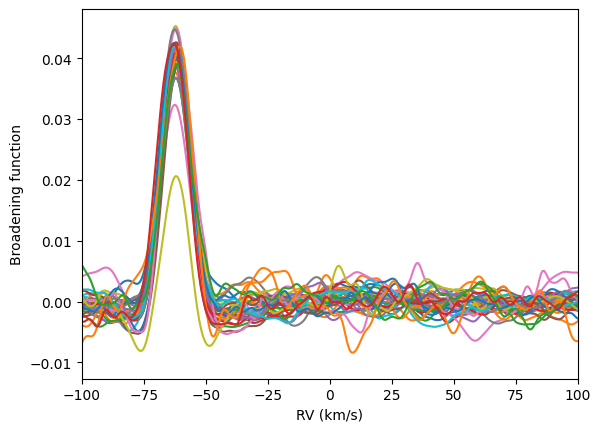

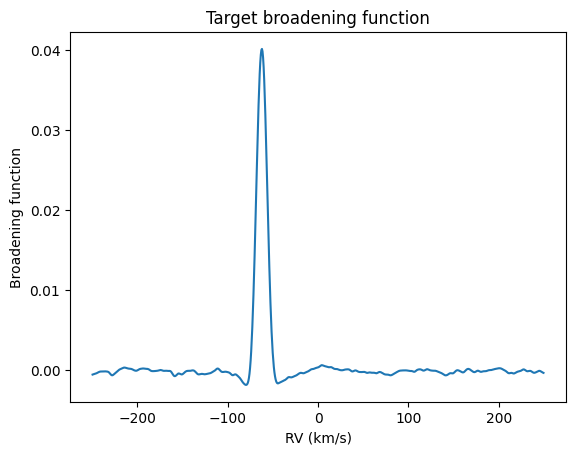

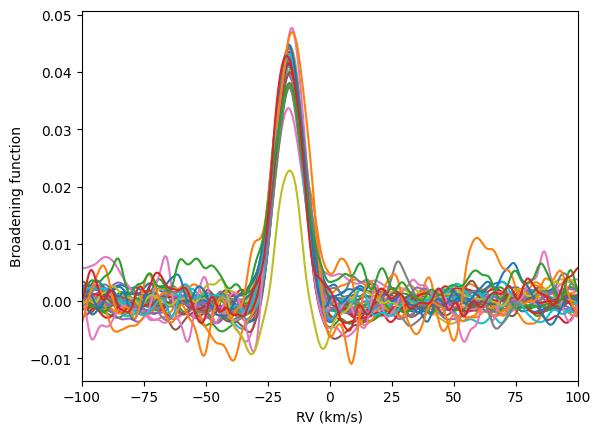

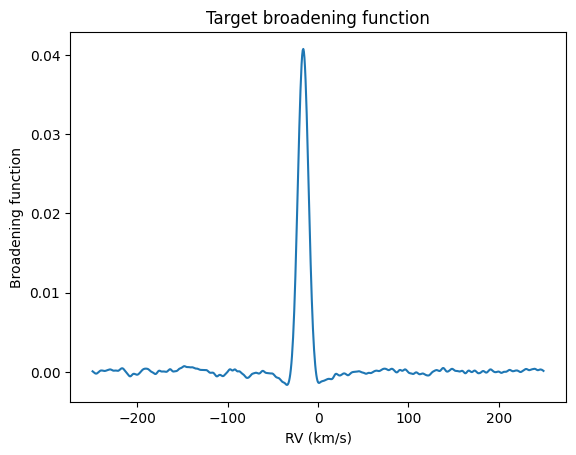

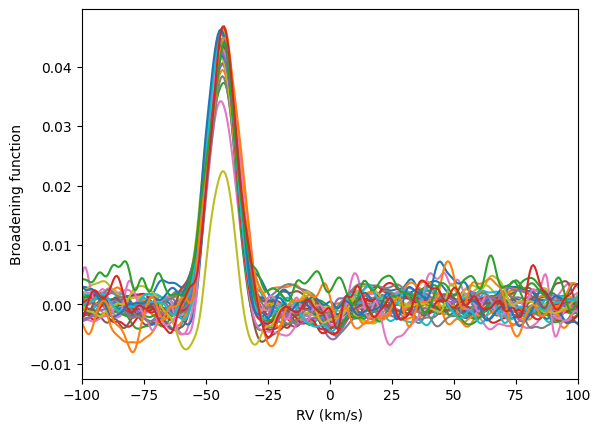

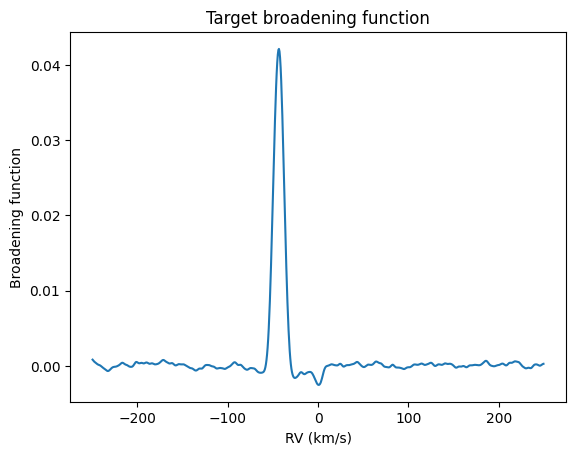

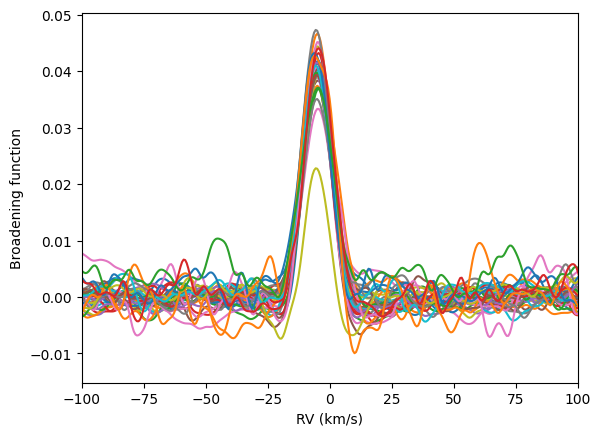

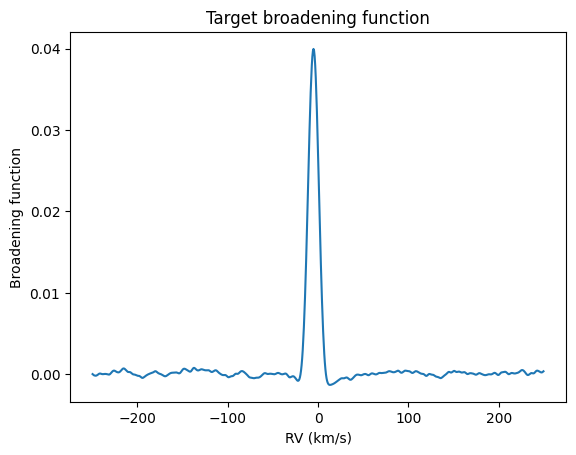

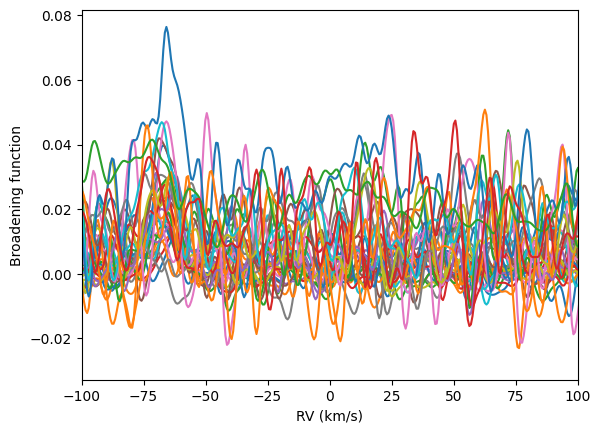

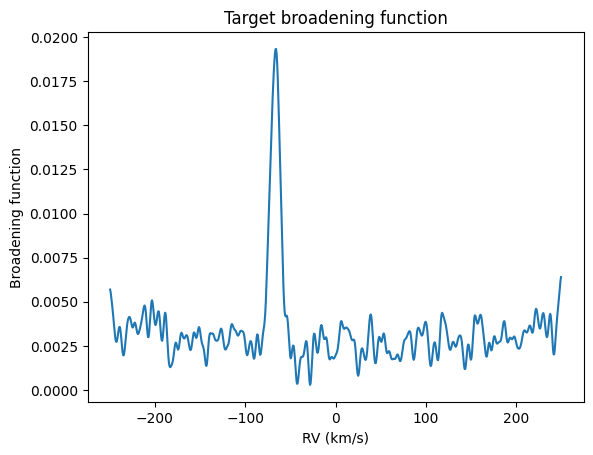

In [5]:
for i in range(len(filenames)): 

    tar,tar_spec = pkl.load(open(filenames[i],'rb'))
    tar_spec = saphires.bf.analysis(tar,tar_spec,R=R_coude)

    BVCORR = SSG_df["BVCORR"][i]
    BJD = SSG_df["BJD"][i]

    fig, ax = plt.subplots(1)
    for k in range(tar.size):
        ax.plot(tar_spec[tar[k]]['vel'], tar_spec[tar[k]]['bf_smooth'])
    ax.set_xlabel('RV (km/s)')
    ax.set_ylabel('Broadening function')
    plt.xlim(-100,100)

    vel,bf,bf_sterr,bf_wstd = saphires.bf.weight_combine(tar,tar_spec,vel_gt_lt=(+150,-150))

    fig, ax = plt.subplots(1)

    ax.plot(vel, bf)
    ax.set_xlabel('RV (km/s)')
    ax.set_ylabel('Broadening function')
    ax.set_title('Target broadening function')